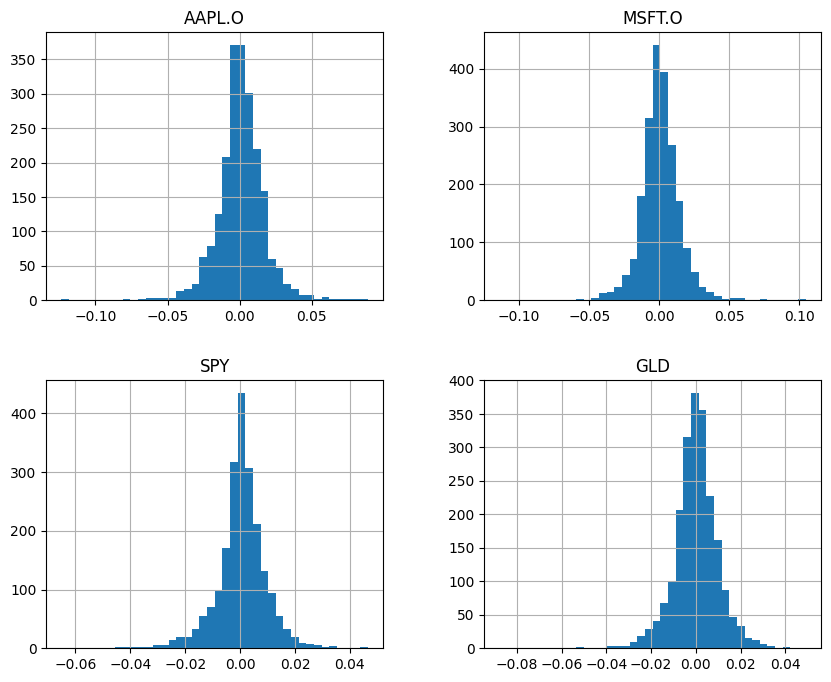

In [1]:
# Read in some eod prices
import numpy as np
import pandas as pd

from pylab import mpl, plt

# Include this to have plots show up in your Jupyter notebook.
%matplotlib inline 

import scipy.optimize as sco

raw = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna() 

symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD'] #two stocks and two ETFs

noa = len(symbols) #noa = number of assets

data = raw[symbols]

rets = data.pct_change().dropna()

rets.hist(bins=40, figsize=(10, 8));

In [2]:
ann_rets = rets.mean() * 252
ann_rets

AAPL.O    0.244313
MSFT.O    0.162139
SPY       0.113901
GLD       0.022214
dtype: float64

In [3]:
ann_cov = rets.cov() * 252
ann_cov

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063710,0.023364,0.021015,0.001497
MSFT.O,0.023364,0.050965,0.022193,-0.000337
SPY,0.021015,0.022193,0.021858,0.000041
GLD,0.001497,-0.000337,0.000041,0.026063


In [4]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.22072965, 0.32670766, 0.23482764, 0.21773505])

In [5]:
weights.sum()

np.float64(1.0)

In [7]:
E_p = np.sum(ann_rets * weights)
E_p

np.float64(0.1384829465966665)

In [8]:
port_val = np.dot(weights.T, np.dot(rets.cov() * 252, weights))
port_val

np.float64(0.020038541726257464)

In [9]:
 def port_ret(weights):
     return np.sum(ann_rets * weights)

In [10]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [11]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

In [12]:
prets

array([0.12241628, 0.13029736, 0.13145562, ..., 0.14222336, 0.17129359,
       0.13300438], shape=(2500,))

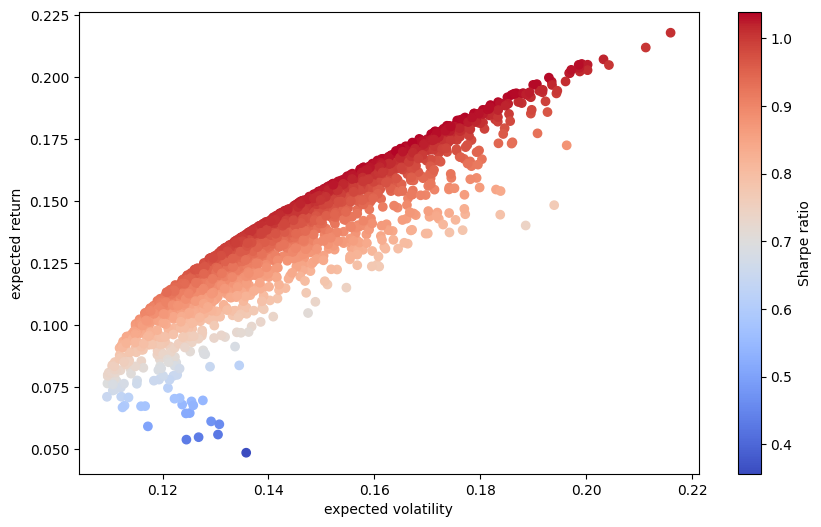

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [14]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
type(cons)

dict

In [23]:
bnds = tuple((0, 1) for x in range(noa))  
bnds

((0, 1), (0, 1), (0, 1), (0, 1))

In [24]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [17]:
eweights = np.array(noa * [1. / noa,])  
eweights  

array([0.25, 0.25, 0.25, 0.25])

In [25]:
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons) 
type(opts)

scipy.optimize._optimize.OptimizeResult

In [26]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0396720559483774
       x: [ 5.011e-01  2.379e-01  1.445e-01  1.165e-01]
     nit: 7
     jac: [-6.139e-06 -2.135e-04  5.583e-05  3.933e-04]
    nfev: 35
    njev: 7